# Build a classification model to predict whether a student passes or fails based on study hours, attendance, and CGPA.

Classify Students as Pass/Fail
Create a new column:
• If Final_Score >= 40 → Pass
• Else → Fail


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt



In [25]:
# 1. Load data
df = pd.read_csv('student_dataset.csv')
df.head()



,Student_ID,Age,Gender,Hours_Studied,Attendance_Rate,Previous_Sem_CGPA,Family_Income,Part_Time_Job,Final_Score
0,1,24,Female,3.6,55.1,7.58,67280,Yes,94.2
1,2,21,Female,6.2,83.2,6.61,99459,No,88.5
2,3,22,Male,2.2,50.3,8.98,36779,No,96.7
3,4,24,Female,1.1,58.0,6.35,83932,No,82.2
4,5,20,Male,2.7,77.4,7.19,92936,No,74.9


### 2. Create 'Result' column

In [42]:
df['Result'] = df['Final_Score'].apply(lambda x: 'Pass' if x >= 40 else 'Fail')

### 3. Select features and encode target

In [58]:
X = df[['Hours_Studied', 'Attendance_Rate', 'Previous_Sem_CGPA']]
y = df['Result'].map({'Pass': 1, 'Fail': 0})

### 4. Split data

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 5. Train model

In [87]:
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### 6. Predict and evaluate

In [100]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9


### Confusion matrix

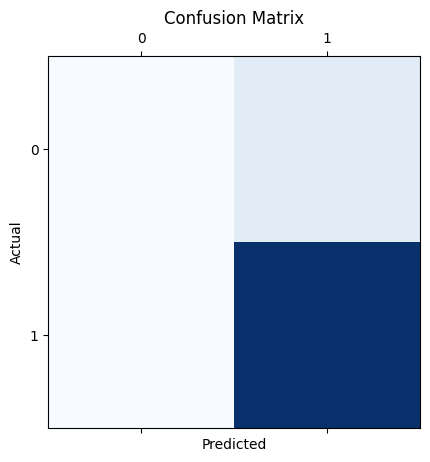

In [112]:

cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()